In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import pandas as pd

def read_file(filename):
    # Read the Worldbank format file using pandas
    # Skip the first 4 rows which contain metadata
    df_data = pd.read_csv(filename, skiprows=4)

    # Replace missing values with 0
    df_data = df_data.fillna(0)

    # Remove unnecessary columns
    df_data = df_data.drop(['Country Code', 'Indicator Code'], axis=1)

    # Transpose the data so that countries are rows and years are columns
    df_countries = df_data.transpose()

    # Return the data in both formats
    return df_data, df_countries


In [134]:

df_years, df_countries = read_file('/content/drive/MyDrive/Colab Notebooks/projects/data visulization/debth/API_GC.DOD.TOTL.GD.ZS_DS2_en_csv_v2_5447792.csv')

In [117]:
df_years_curve=df_years

In [118]:
df_countries

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Indicator Name,"Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)",...,"Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)","Central government debt, total (% of GDP)"
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.0,0.0,0.0,0.0,0.0,64.570326,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.712221,0.0
2019,0.0,0.0,0.0,0.0,0.0,75.698488,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.930117,0.0
2020,0.0,0.0,0.0,0.0,0.0,84.058619,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.698242,0.0
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = df_years

# Get the last 10 years of data
data = df.loc[:, "2010":"2020"]
data_2 = df.loc[:, "2000":"2010"]
data_3 = df.loc[:, "1990":"2000"]


# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_data_2 = scaler.fit_transform(data_2)
normalized_data_3 = scaler.fit_transform(data_3)

# Define the number of clusters
n_clusters = 2

# Apply KMeans clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(normalized_data)
labels_2 = kmeans.fit_predict(normalized_data_2)
labels_3 = kmeans.fit_predict(normalized_data_3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [120]:
# Add the cluster labels to the original dataframe
df["Cluster"] = labels
df["Cluster_2"] = labels_2
df["Cluster_3"] = labels_3
# Print the cluster assignments
print(df[["Country Name", "Cluster","Cluster_2","Cluster_3"]])

                    Country Name  Cluster  Cluster_2  Cluster_3
0                          Aruba        0          0          0
1    Africa Eastern and Southern        0          0          0
2                    Afghanistan        0          0          0
3     Africa Western and Central        0          0          0
4                         Angola        0          0          0
..                           ...      ...        ...        ...
261                       Kosovo        0          0          0
262                  Yemen, Rep.        0          0          0
263                 South Africa        0          0          1
264                       Zambia        0          0          1
265                     Zimbabwe        0          0          0

[266 rows x 4 columns]


In [ ]:
# Get the indices of each cluster
cluster_1_indices = df[df["Cluster"] == 0].index
cluster_2_indices = df[df["Cluster"] == 1].index

# Print the names of countries in each cluster
print("Cluster 1 countries:")
print(df.loc[cluster_1_indices, "Country Name"].to_string(index=False))
print()
print("Cluster 2 countries:")
print(df.loc[cluster_2_indices, "Country Name"].to_string(index=False))
print()


In [121]:
# Count the number of countries in each cluster for 2010 to 2020
cluster_counts = df["Cluster"].value_counts()
print("Cluster 1 has {} countries".format(cluster_counts[0]))
print("Cluster 2 has {} countries".format(cluster_counts[1]))


Cluster 1 has 237 countries
Cluster 2 has 29 countries


In [122]:
# Count the number of countries in each cluster for 2000 to 2010
cluster_counts = df["Cluster_2"].value_counts()
print("Cluster 1 has {} countries".format(cluster_counts[0]))
print("Cluster 2 has {} countries".format(cluster_counts[1]))

Cluster 1 has 224 countries
Cluster 2 has 42 countries


In [123]:
# Count the number of countries in each cluster for 1990 to 2000
cluster_counts = df["Cluster_3"].value_counts()
print("Cluster 1 has {} countries".format(cluster_counts[0]))
print("Cluster 2 has {} countries".format(cluster_counts[1]))

Cluster 1 has 220 countries
Cluster 2 has 46 countries


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(data, labels, cluster_names):
    """
    This function plots the clusters with color-coded points based on cluster assignments.
    
    Parameters:
    data (list of numpy arrays): List of numpy arrays containing the data points for each cluster
    labels (list of numpy arrays): List of numpy arrays containing the cluster assignments for each data point
    cluster_names (list of str): List of cluster names for each cluster
    
    Returns:
    None
    """
    
    # Define the number of clusters
    n_clusters = len(data)
    
    # Create a figure with n_clusters subplots in a column
    fig, axs = plt.subplots(nrows=1, ncols=n_clusters, figsize=(20, 6))
    
    # Loop over each cluster
    for cluster in range(n_clusters):
        # Filter the data for the current cluster
        cluster_data = data[cluster]
        cluster_labels = labels[cluster]
        cluster_name = cluster_names[cluster]

        # Create a scatter plot with color-coded points based on cluster assignments
        sns.scatterplot(x=cluster_data[:, -2], y=cluster_data[:, -1], hue=cluster_labels, palette='viridis', s=100, ax=axs[cluster])

        # Add axis labels and legend
        axs[cluster].set_xlabel('', fontsize=12)
        axs[cluster].set_ylabel('', fontsize=12)
        axs[cluster].legend(fontsize=10)

        # Add a title
        axs[cluster].set_title('{} clustering'.format(cluster_name), fontsize=14)

        # Customize the tick labels
        axs[cluster].tick_params(labelsize=10)

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


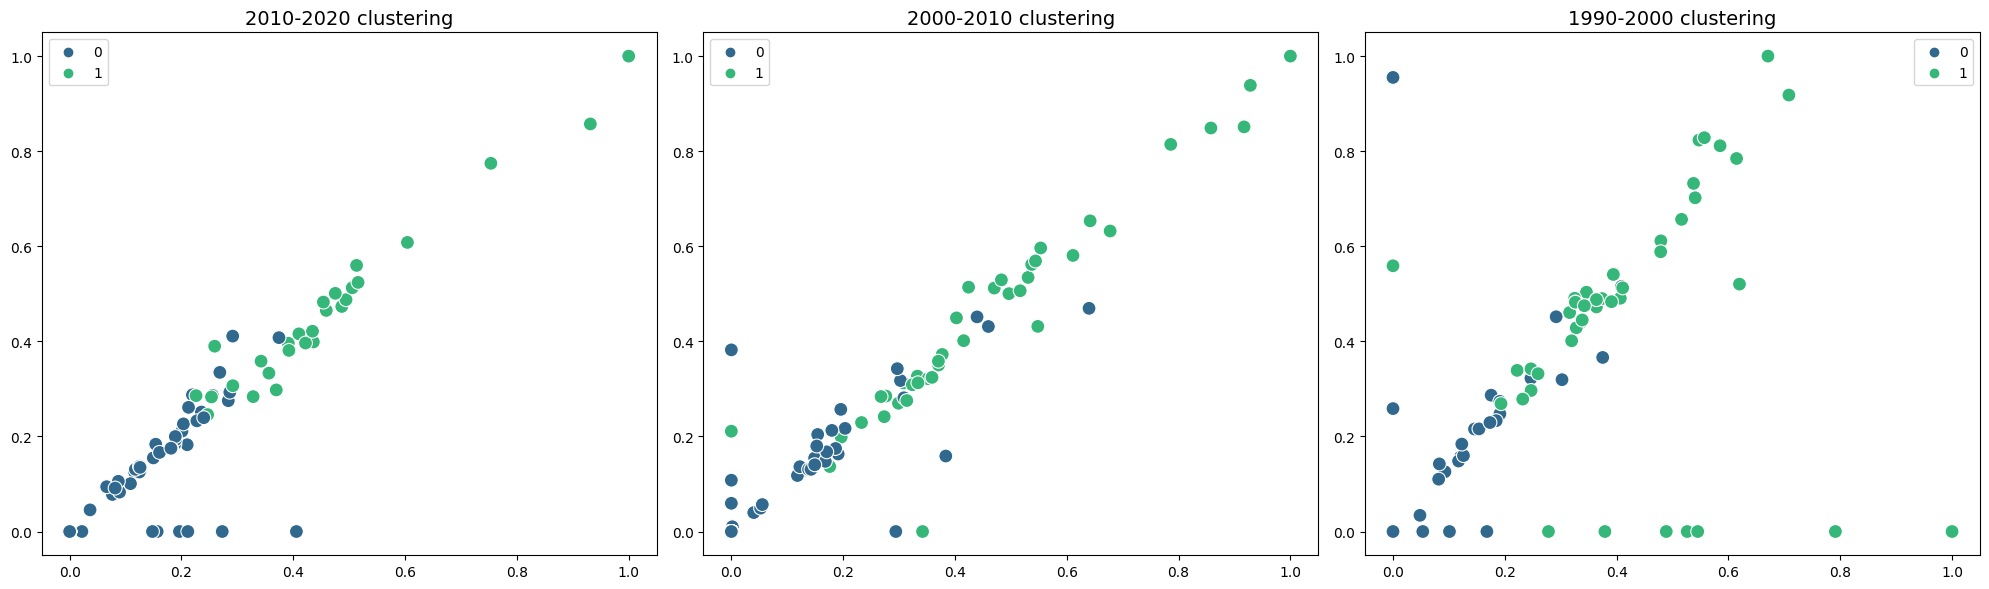

In [125]:
# Define the data, labels, and cluster names
data = [normalized_data, normalized_data_2, normalized_data_3]
labels = [labels, labels_2, labels_3]
cluster_names = ['2010-2020', '2000-2010', '1990-2000']

# Call the function to plot the clusters
plot_clusters(data, labels, cluster_names)


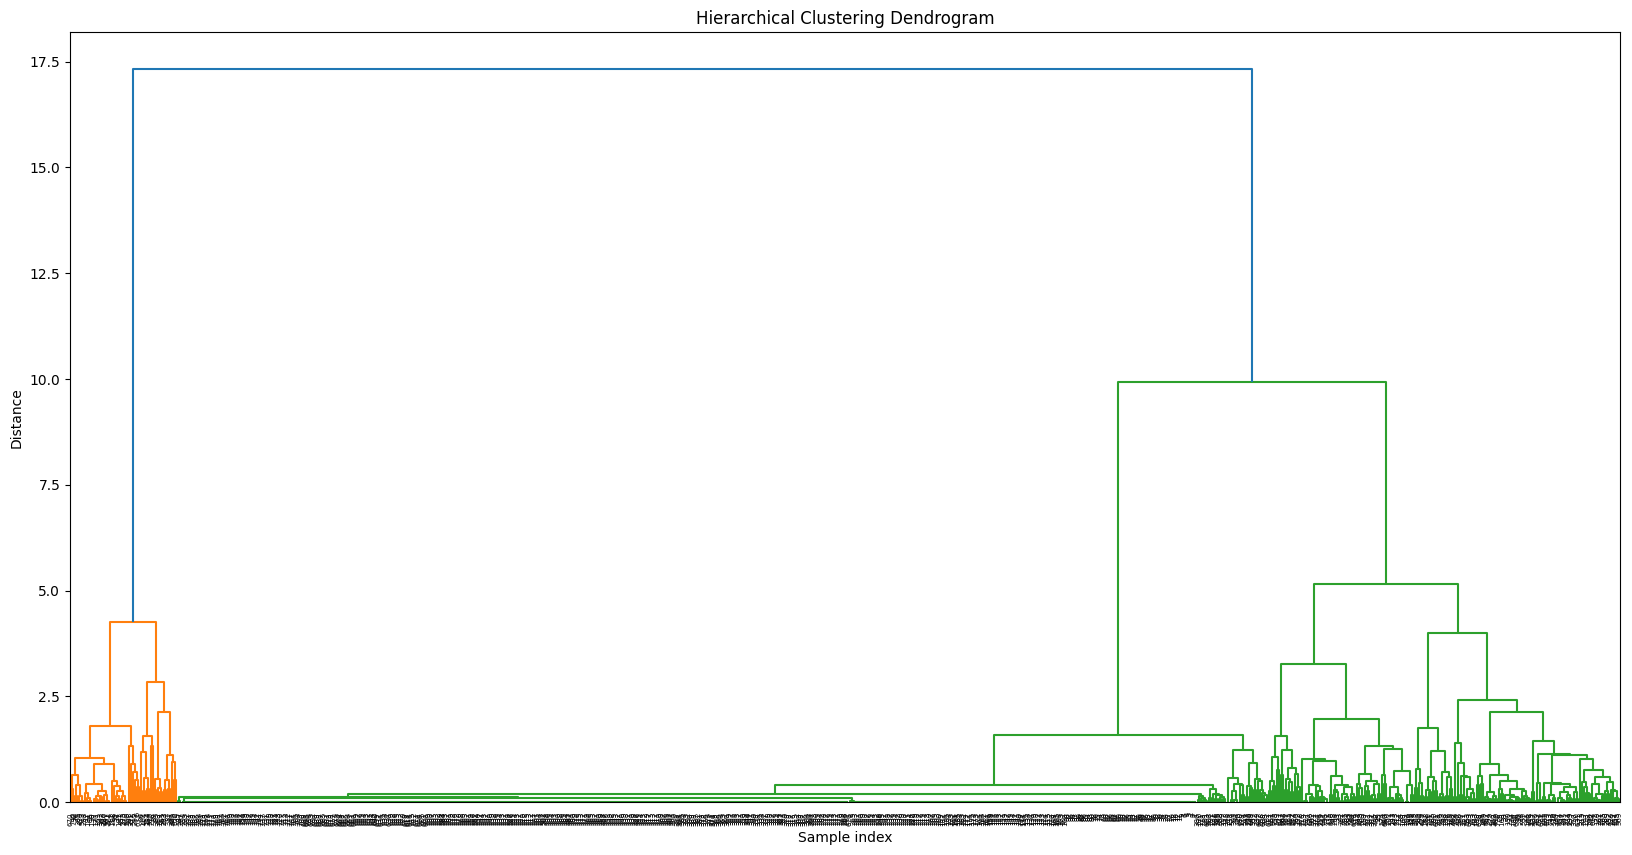

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Define the linkage method and metric for hierarchical clustering
linkage_method = 'ward'
distance_metric = 'euclidean'

# Concatenate the data from all clusters into one array
all_data = np.concatenate((normalized_data, normalized_data_2, normalized_data_3), axis=0)

# Perform hierarchical clustering on the combined data
Z = linkage(all_data, method=linkage_method, metric=distance_metric)

# Plot the dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()


In [181]:
df_curve=df_years
# Assuming your dataframe is named 'df'
# Sweden is in cluster 1 for 2010 to 2020
# United States is in cluster 2 for 2010 to 2020 data
country_prediction='United States'
country_data = df_curve.loc[df['Country Name'] == country_prediction].iloc[:, 2:-2].T
years = np.array(range(1960, 2021))

In [182]:
years = pd.DataFrame(years)


In [183]:
country_data

,251
1960,0.000000
1961,0.000000
1962,0.000000
1963,0.000000
1964,0.000000
...,...
2016,98.504102
2017,97.774934
2018,99.149584
2019,100.902573


In [184]:
years

,0
0,1960
1,1961
2,1962
3,1963
4,1964
...,...
56,2016
57,2017
58,2018
59,2019


In [185]:
years=years.squeeze()

In [186]:
country_data=country_data.squeeze()

In [187]:
def exponential_model(x, a, b, c):
    """
    Exponential model function.

    This function takes in an array of x values, and three parameters a, b, and c.
    It returns an array of y values that represent an exponential model function
    with the form y = a * exp(b * (x - min(x))) + c.

    Parameters:
    -----------
    x : array-like
        The independent variable.
    a : float
        Amplitude of the exponential function.
    b : float
        Decay rate of the exponential function.
    c : float
        Offset of the exponential function.

    Returns:
    --------
    y : array
        The dependent variable, calculated using the input x values and the
        specified parameters a, b, and c.
    """
    return a * np.exp(b * (x - year.min())) + c


[2038 2039]
[2.27202500e+20 6.17600424e+20]


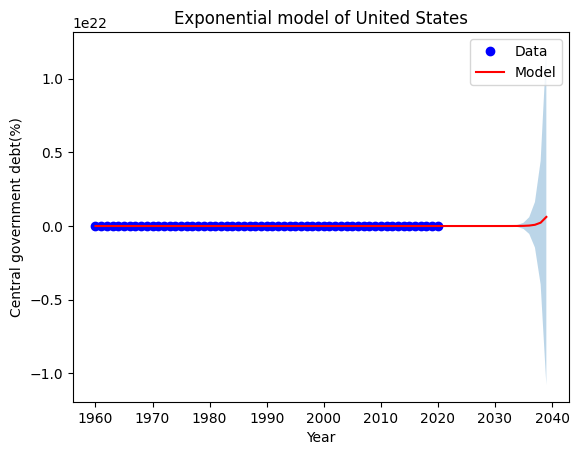

In [190]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Extract the relevant data columns
year = years
attribute = country_data



# Fit the model to the data
popt, pcov = curve_fit(exponential_model, year, attribute)

# Use the model to make predictions for the next 20 years
future_years = np.arange(year.min(), year.max() + 20)
future_attribute = exponential_model(future_years, *popt)
print(future_years[-2:])
print(future_attribute[-2:])
# Estimate the confidence range using the attached function err_ranges
def err_ranges(popt, pcov, x):
    perr = np.sqrt(np.diag(pcov))
    y = exponential_model(x, *popt)
    low = y - perr[0] * np.exp(popt[1] * (x - year.min()))
    high = y + perr[0] * np.exp(popt[1] * (x - year.min()))
    return low, high

future_low, future_high = err_ranges(popt, pcov, future_years)

# Plot the data, model, and confidence range
plt.plot(year, attribute, 'bo', label='Data')
plt.plot(future_years, future_attribute, 'r-', label='Model')
plt.fill_between(future_years, future_low, future_high, alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Central government debt(%)')
plt.title('Exponential model of '+str(country_prediction))
plt.legend()
plt.show()


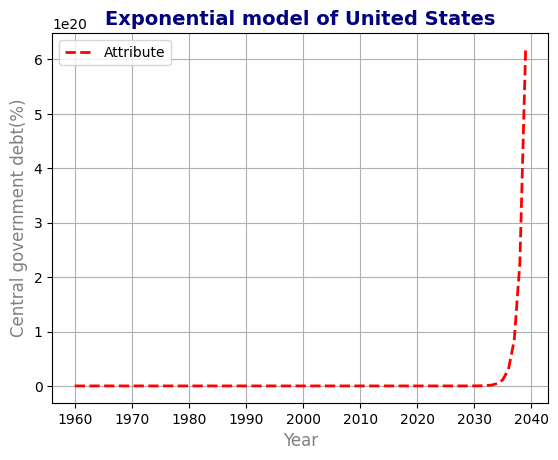

In [191]:
import matplotlib.pyplot as plt

# Define the x and y data
x = future_years
y = future_attribute

# Plot the data with a dashed red line
plt.plot(x, y, 'r--', linewidth=2)

# Add grid lines
plt.grid(True)

# Customize the axis labels and title
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Central government debt(%)', fontsize=12, color='gray')
plt.title('Exponential model of '+str(country_prediction), fontsize=14, fontweight='bold', color='navy')

# Add a legend
plt.legend(['Attribute'], loc='upper left')

# Show the plot
plt.show()
